In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
    # Read data into DataFrame from CSV file
    cyclone_df = pd.read_csv("Cyclone_ML.csv")

    # Select features for machine learning and assign to X
    selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD"]]
    X = selected_features

    # Set y to compass direction of cyclone based on wind direction degree
    y = cyclone_df["MAX_REP_WIND_DIR"]

    print(X.shape, y.shape)

(1691, 6) (1691,)


In [43]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD
0,1.0,20.0,-11.00,92.60,1001.0,12.9
1,1.0,20.0,-11.10,93.10,1002.0,12.9
2,1.0,20.0,-11.10,94.20,1003.0,12.9
3,1.0,20.0,-11.10,94.60,1000.0,12.9
4,1.0,20.0,-11.20,95.00,1002.0,12.9
...,...,...,...,...,...,...
1686,2.0,30.0,-14.30,126.40,986.0,20.6
1687,4.0,21.0,-12.73,130.61,999.0,20.6
1688,2.0,30.0,-12.54,130.72,993.0,18.0
1689,2.0,30.0,-12.41,130.99,995.0,18.0


In [44]:
y

0       100.0
1       110.0
2       160.0
3       210.0
4       250.0
        ...  
1686    270.0
1687    350.0
1688    210.0
1689    210.0
1690    220.0
Name: MAX_REP_WIND_DIR, Length: 1691, dtype: float64

In [45]:
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
    # Linear Regression Model
    model = LinearRegression()

    # Fit the model to the training data and calculate the scores for the training and testing data
    model.fit(X_train, y_train)

LinearRegression()

In [47]:
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    print(f"Training Data Score: {training_score}")
    print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.020355063480022806
Testing Data Score: 0.022540465552092215


In [48]:
    preds = model.predict(X_test)
    preds

array([182.76686899, 166.42464022, 159.33273741, 167.22510748,
       211.45117099, 154.8194823 , 178.35934064, 163.10826611,
       182.2918884 , 179.81307138, 138.72896037, 143.41946888,
       171.15376829, 178.74825773, 176.88875901, 173.26322067,
       194.64999137, 150.4412231 , 186.87683322, 157.94653037,
       180.44921904, 149.82889402, 171.95099147, 153.51781031,
       166.89103513, 154.22091322, 202.86067111, 173.55352675,
       180.08512822, 172.98115538, 161.0926439 , 174.73367101,
       155.39421355, 182.68882558, 150.01644887, 168.94840449,
       165.83784564, 175.56150966, 171.97309469, 174.46719647,
       159.65103437, 179.90098373, 180.83023226, 171.73333205,
       167.02782573, 162.10641373, 177.81995961, 162.11950202,
       157.83197711, 182.23964724, 162.3130374 , 172.29909663,
       170.27798943, 169.64644931, 165.67867617, 175.38734007,
       161.20704047, 170.50242821, 183.57524831, 151.5700418 ,
       173.3692959 , 173.06868836, 164.80598151, 159.33

Text(0.5, 1.0, 'Residual Plot')

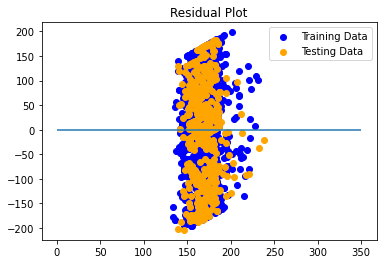

In [49]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")